<a href="https://colab.research.google.com/github/Muzammil9822/Projects/blob/main/ASSIGNMENT_05_CSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT - 05

## STEPS
### 0) Install all required packages
### 1) Load .mp3 file
### 2) Convert it into another .wav file
### 3) analyze the audio file
### 4) Convert Speech to Text
### 5) Convert Text to Speech


In [ ]:
!pip install librosa


In [ ]:
!pip install pydub


In [ ]:
!pip install pyttsx3


In [ ]:
!pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 22.2 MB/s eta 0:00:00


In [ ]:
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install pyttsx3

In [ ]:
import librosa

In [ ]:
from os import path

In [ ]:
from pydub import AudioSegment

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import IPython.display as ipd

In [ ]:
from scipy.io.wavfile import write

In [ ]:
import soundfile as sf

In [ ]:
from sklearn.preprocessing import minmax_scale

In [ ]:
import sklearn

In [ ]:
import numpy as np # linear algebra

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os

In [ ]:
import speech_recognition as sr

In [ ]:
import pyttsx3

In [ ]:
# convert mp3 to 2av
sound = AudioSegment.from_mp3('/content/Be Present! _ Jay Shetty _ Shorts.mp3')
wav_location = ('/content/be_present.wav')
sound.export(wav_location, format="wav")

<_io.BufferedRandom name='/content/be_present.wav'>

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_data =('/content/Be Present! _ Jay Shetty _ Shorts.mp3')

In [ ]:
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(1183744,) 22050


In [ ]:
librosa.load(audio_data, sr=44100)

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

In [ ]:
# PLAY AND CHECK AUDIO FILE
ipd.Audio(audio_data)

# STEP 03 : Analyzing and Visualizing Audio

<class 'numpy.ndarray'> <class 'int'>
(1183744,) 22050


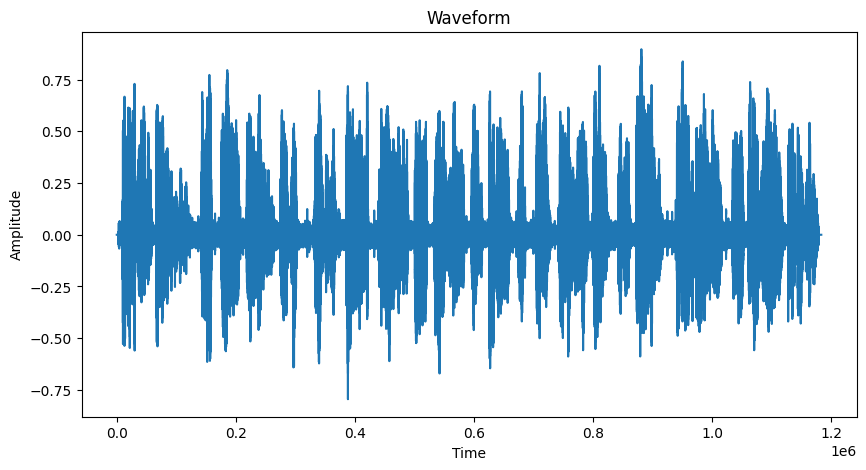

In [ ]:
# Print the types and shapes of loaded data
print(type(x), type(sr))  # <class 'numpy.ndarray'> <class 'int'>
print(x.shape, sr)  # (94316,) 22050

# Plot the waveform
plt.figure(figsize=(10, 5))
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

## Spectrogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.¶
A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal. .specshow is used to display a spectrogram.¶
The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.¶

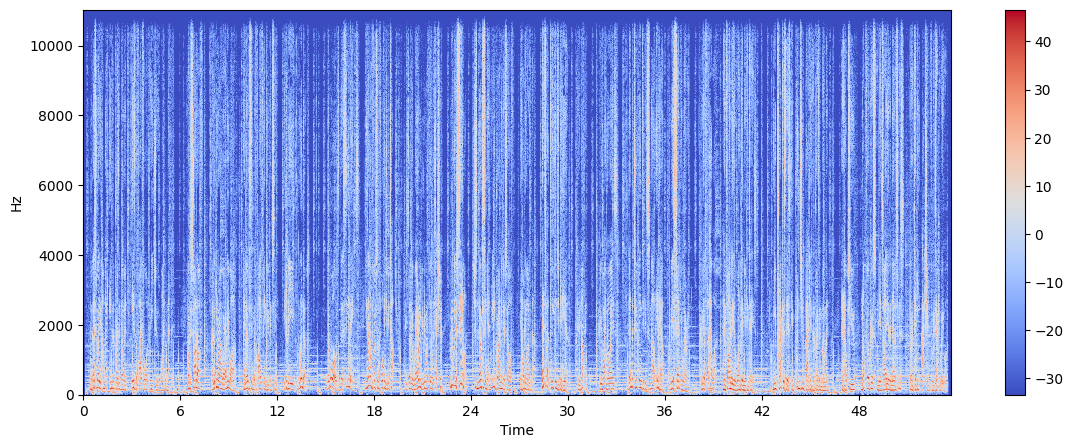

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

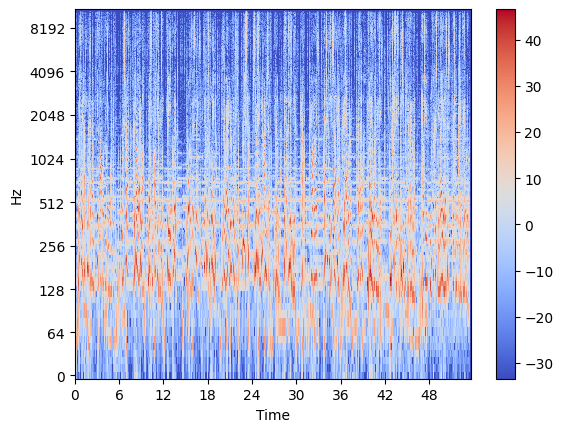

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Create an Audio Signal

In [ ]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array
#Saving the audio
sf.write('tone_220.wav', x, sr)

.spectral_centroid will return an array with columns equal to a number of frames present in your sample.

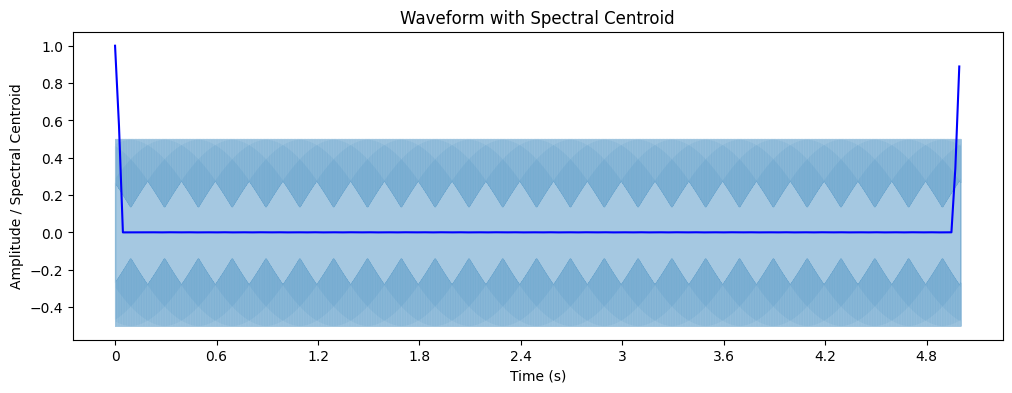

In [ ]:
# Calculate spectral centroids
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalizing the spectral centroid for visualization
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
# Plotting the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr, alpha=0.4)  # Use waveshow instead of waveplot
plt.plot(t, normalize(spectral_centroids), color='b')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / Spectral Centroid')
plt.title('Waveform with Spectral Centroid')
plt.show()

## Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.¶
librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:

[Text(0.5, 1.0, 'log Power spectrogram')]

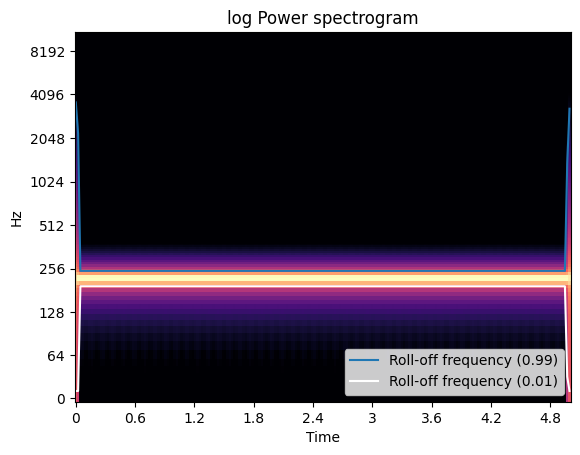

In [ ]:
rolloff = librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.99)
# Approximate minimum frequencies with roll_percent=0.01
rolloff_min = librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.01)
S, phase = librosa.magphase(librosa.stft(x))
librosa.feature.spectral_rolloff(S=S, sr=sr)
librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.95)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

In [ ]:
"""# Print the types and shapes of loaded data
print(type(x), type(sr))  # <class 'numpy.ndarray'> <class 'int'>
print(x.shape, sr)  # (94316,) 22050

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(x)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

"""

"# Print the types and shapes of loaded data\nprint(type(x), type(sr))  # <class 'numpy.ndarray'> <class 'int'>\nprint(x.shape, sr)  # (94316,) 22050\n\n# Plot the waveform\nplt.figure(figsize=(14, 5))\nplt.plot(x)\nplt.xlabel('Time')\nplt.ylabel('Amplitude')\nplt.title('Waveform')\nplt.show()\n# Zooming in\nn0 = 9000\nn1 = 9100\nplt.figure(figsize=(14, 5))\nplt.plot(x[n0:n1])\nplt.grid()\n\n"

## How many zero crossings?

In [ ]:
"""zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))"""

'zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)\nprint(sum(zero_crossings))'

## Mel-Frequency Cepstral Coefficients(MFCCs)

In [ ]:
"""fs=10
mfccs = librosa.feature.mfcc(y=x, sr=fs)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')"""

## Chroma feature

In [ ]:
"""hop_length=12
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')"""

In [ ]:
import speech_recognition as sr

In [ ]:
recognizer = sr.Recognizer()

In [ ]:
audio_file = "/content/be_present.wav"

In [ ]:
with sr.AudioFile(audio_file) as source:
    # Listen to the audio file
    audio = recognizer.listen(source)

In [ ]:
try:
    text = recognizer.recognize_google(audio)
    print("You said:", text)
except sr.UnknownValueError:
    print("Sorry, I could not understand.")

You said: the best way to come back into the present moment is the 54321 method you want to start off by looking around wherever you are and noticing the five things you can see it could be the windows the walls the ceilings you don't want to focus on the four things you can touch it could be something you're wearing and you really want to feel the texture and really grounding yourself and holding on to that then it's about three things you can hear can be nothing can be white noise then the two things you can smell inhale could be a sent you wearing could be a flower and then finally the one thing you can taste when you practice this it brings you back into the present moment and helps you not focus on the anxiety of the nervousness but I'm taking action from exactly what you are


# TEXT TO SPEECH